<a href="https://colab.research.google.com/github/enzoulian/bootcamp-dsa-proj-modulo1/blob/main/notebooks/DSA_Projeto_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*#bootcampdatascience #alura*

Este Colab é o **Projeto do Módulo 1** do **Bootcamp de Data Science Aplicada** ministrado pela **Alura**.

#Escopo da Análise

>Neste projeto, iremos explorar dados fornecidosp pelo **Ministério da Saúde** (SUS) e do **IBGE**, a fim de extrair informações relevantes na área da saúde.

>O objetivo é analisar o valor médio de uma AIH (*autorição de internação hospitalar*) durante o período de 2008 a 2020, e aplicar sobre ela a inflação ([IPCA](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=o-que-e) - *Índice Nacional de Preços ao Consumidor Amplo*) nesse período.

>**OBS:** estaremos filtrando os Dataframes e utilizando o período de janeiro de 2008 a janeiro de 2020, eliminando os efeitos da pandemia do COVID-19 que se iniciou em março de 2020.

# Fonte de Dados

## Custo médio de AIH - DataSUS

>Utilizamos o portal do [DataSUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi) para obter os dados.
>Os dados filtrados e baixados foram dados **Dados Consolidados AIH (RD), por local de internação, a partir de 2008**, na qual foram agrupados por **Unidades de Federação** e **Ano/mês processamento**, referente ao **Valor médio AIH**.

### Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Importando o dado do Github

In [ ]:
url = 'https://github.com/enzoulian/bootcamp-dsa-proj-modulo1/raw/main/dados/A144108189_28_143_208.csv'
dados_custo = pd.read_csv(url, encoding='ISO-8859-1', skiprows=3, skipfooter=12 ,sep=';', thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [ ]:
dados_custo.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,335.230,401.490,357.040,355.970,364.880,363.250,405.460,424.360,415.240,432.300,403.460,443.510,447.950,381.300,470.320,457.660,446.040,461.440,473.360,442.480,459.710,471.120,463.670,459.710,430.370,432.600,474.560,491.620,517.090,556.050,577.560,536.030,577.470,533.160,545.520,527.370,550.470,488.960,514.080,...,846.740,895.640,859.700,862.140,806.830,818.580,855.540,884.250,776.170,847.740,876.840,890.360,963.300,846.200,904.110,880.390,851.580,760.220,919.820,898.920,860.680,1001.150,940.910,832.560,829.620,805.800,853.030,958.270,1027.870,1349.990,1415.620,1384.790,1145.390,974.300,1033.110,1092.350,1148.920,1196.130,1714.090,718.320
1,12 Acre,432.400,487.530,474.230,463.060,504.140,454.170,514.700,491.550,499.940,466.060,458.030,541.580,563.680,531.500,510.010,578.790,585.770,566.960,574.030,526.960,nan,602.790,548.320,587.360,564.610,533.280,568.640,560.690,631.320,563.890,546.170,622.200,586.950,578.280,568.380,620.540,647.570,620.800,569.540,...,776.170,751.250,778.940,720.640,681.710,814.550,789.900,749.720,706.310,756.780,884.760,819.540,811.410,656.940,815.070,794.080,776.550,773.830,738.300,794.690,784.970,734.380,831.920,825.160,880.500,835.830,815.700,771.990,930.700,954.320,1122.480,964.020,969.480,952.500,907.140,999.730,944.760,1012.720,1017.480,704.720
2,13 Amazonas,507.830,555.870,552.820,565.480,608.030,600.370,605.380,595.400,619.740,587.960,527.100,628.850,668.150,652.930,683.540,678.420,702.600,687.550,670.820,715.550,696.890,695.130,652.850,727.820,694.750,676.340,694.080,696.300,688.600,765.270,738.380,712.570,701.980,683.680,731.310,693.160,689.910,677.660,678.830,...,900.380,910.760,947.240,948.030,931.690,940.980,939.160,921.480,1001.010,1016.370,1012.840,936.320,962.590,936.460,972.790,973.270,966.700,977.390,936.570,980.430,973.560,944.030,974.000,941.420,978.820,965.180,928.810,1033.730,1375.900,1411.260,1313.240,1267.900,1166.840,1063.470,1318.900,1279.450,1476.220,1501.140,1389.600,851.520
3,14 Roraima,446.030,429.330,396.410,427.700,423.340,410.070,432.030,415.360,475.910,467.360,437.180,557.250,495.740,491.900,611.870,544.330,522.070,580.000,564.620,611.440,558.090,552.520,553.550,755.800,630.410,657.180,681.920,667.310,603.390,619.760,635.680,608.490,667.330,700.730,667.280,659.460,659.990,612.470,593.620,...,784.020,763.050,768.270,778.820,745.970,825.110,781.370,732.840,774.730,765.200,749.970,818.370,772.110,838.510,669.950,763.700,822.780,794.010,725.610,776.100,736.880,726.200,785.760,822.170,831.700,771.530,821.410,915.970,943.840,1195.310,1040.180,866.220,955.940,887.770,1054.160,988.120,1034.820,1065.310,1215.840,705.760
4,15 Pará,488.370,470.760,512.170,506.460,520.310,533.680,531.610,534.110,568.270,547.840,528.120,602.920,602.410,587.600,600.740,607.370,608.560,596.430,595.720,596.720,607.080,619.170,596.870,604.640,592.570,603.780,601.430,591.830,594.560,607.350,612.810,614.550,608.060,618.500,624.090,608.940,622.180,615.300,612.030,...,800.040,798.320,811.530,836.610,818.260,858.830,822.040,850.990,820.680,846.130,833.450,865.570,884.550,834.750,818.190,861.010,845.870,848.970,779.390,809.320,831.660,860.610,897.320,887.580,869.390,914.270,901.440,919.720,1103.310,1314.330,1223.880,1146.350,1020.740,997.540,1022.470,1029.080,1049.750,1104.390,1

In [ ]:
custo_inter = dados_custo

### Alterando índice

>Configurando o índice do Dataframe como Unidade da Federação, para facilitar a busca de determinada linha.

In [ ]:
custo_inter = custo_inter.set_index('Unidade da Federação')
custo_inter.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,335.230,401.490,357.040,355.970,364.880,363.250,405.460,424.360,415.240,432.300,403.460,443.510,447.950,381.300,470.320,457.660,446.040,461.440,473.360,442.480,459.710,471.120,463.670,459.710,430.370,432.600,474.560,491.620,517.090,556.050,577.560,536.030,577.470,533.160,545.520,527.370,550.470,488.960,514.080,581.120,...,846.740,895.640,859.700,862.140,806.830,818.580,855.540,884.250,776.170,847.740,876.840,890.360,963.300,846.200,904.110,880.390,851.580,760.220,919.820,898.920,860.680,1001.150,940.910,832.560,829.620,805.800,853.030,958.270,1027.870,1349.990,1415.620,1384.790,1145.390,974.300,1033.110,1092.350,1148.920,1196.130,1714.090,718.320
12 Acre,432.400,487.530,474.230,463.060,504.140,454.170,514.700,491.550,499.940,466.060,458.030,541.580,563.680,531.500,510.010,578.790,585.770,566.960,574.030,526.960,nan,602.790,548.320,587.360,564.610,533.280,568.640,560.690,631.320,563.890,546.170,622.200,586.950,578.280,568.380,620.540,647.570,620.800,569.540,608.650,...,776.170,751.250,778.940,720.640,681.710,814.550,789.900,749.720,706.310,756.780,884.760,819.540,811.410,656.940,815.070,794.080,776.550,773.830,738.300,794.690,784.970,734.380,831.920,825.160,880.500,835.830,815.700,771.990,930.700,954.320,1122.480,964.020,969.480,952.500,907.140,999.730,944.760,1012.720,1017.480,704.720
13 Amazonas,507.830,555.870,552.820,565.480,608.030,600.370,605.380,595.400,619.740,587.960,527.100,628.850,668.150,652.930,683.540,678.420,702.600,687.550,670.820,715.550,696.890,695.130,652.850,727.820,694.750,676.340,694.080,696.300,688.600,765.270,738.380,712.570,701.980,683.680,731.310,693.160,689.910,677.660,678.830,725.180,...,900.380,910.760,947.240,948.030,931.690,940.980,939.160,921.480,1001.010,1016.370,1012.840,936.320,962.590,936.460,972.790,973.270,966.700,977.390,936.570,980.430,973.560,944.030,974.000,941.420,978.820,965.180,928.810,1033.730,1375.900,1411.260,1313.240,1267.900,1166.840,1063.470,1318.900,1279.450,1476.220,1501.140,1389.600,851.520
14 Roraima,446.030,429.330,396.410,427.700,423.340,410.070,432.030,415.360,475.910,467.360,437.180,557.250,495.740,491.900,611.870,544.330,522.070,580.000,564.620,611.440,558.090,552.520,553.550,755.800,630.410,657.180,681.920,667.310,603.390,619.760,635.680,608.490,667.330,700.730,667.280,659.460,659.990,612.470,593.620,594.550,...,784.020,763.050,768.270,778.820,745.970,825.110,781.370,732.840,774.730,765.200,749.970,818.370,772.110,838.510,669.950,763.700,822.780,794.010,725.610,776.100,736.880,726.200,785.760,822.170,831.700,771.530,821.410,915.970,943.840,1195.310,1040.180,866.220,955.940,887.770,1054.160,988.120,1034.820,1065.310,1215.840,705.760
15 Pará,488.370,470.760,512.170,506.460,520.310,533.680,531.610,534.110,568.270,547.840,528.120,602.920,602.410,587.600,600.740,607.370,608.560,596.430,595.720,596.720,607.080,619.170,596.870,604.640,592.570,603.780,601.430,591.830,594.560,607.350,612.810,614.550,608.060,618.500,624.090,608.940,622.180,615.300,612.030,637.790,...,800.040,798.320,811.530,836.610,818.260,858.830,822.040,850.990,820.680,846.130,833.450,865.570,884.550,834.750,818.190,861.010,845.870,848.970,779.390,809.320,831.660,860.610,897.320,887.580,86

### Verificando tipos de dados

>Verificando se há dados nulos, não numéricos ou do tipo *object*

In [ ]:
custo_inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 160 entries, 2008/Jan to Total
dtypes: float64(160)
memory usage: 34.0+ KB


In [ ]:
custo_inter.dtypes

2008/Jan    float64
2008/Fev    float64
2008/Mar    float64
2008/Abr    float64
2008/Mai    float64
             ...   
2020/Dez    float64
2021/Jan    float64
2021/Fev    float64
2021/Mar    float64
Total       float64
Length: 160, dtype: object

In [ ]:
custo_inter.isnull().sum().sum()

1

In [ ]:
custo_inter.isna().sum().sum()

1

In [ ]:
pd.options.display.float_format = "{:.3f}".format

In [ ]:
custo_inter.head() 

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,335.230,401.490,357.040,355.970,364.880,363.250,405.460,424.360,415.240,432.300,403.460,443.510,447.950,381.300,470.320,457.660,446.040,461.440,473.360,442.480,459.710,471.120,463.670,459.710,430.370,432.600,474.560,491.620,517.090,556.050,577.560,536.030,577.470,533.160,545.520,527.370,550.470,488.960,514.080,581.120,...,846.740,895.640,859.700,862.140,806.830,818.580,855.540,884.250,776.170,847.740,876.840,890.360,963.300,846.200,904.110,880.390,851.580,760.220,919.820,898.920,860.680,1001.150,940.910,832.560,829.620,805.800,853.030,958.270,1027.870,1349.990,1415.620,1384.790,1145.390,974.300,1033.110,1092.350,1148.920,1196.130,1714.090,718.320
12 Acre,432.400,487.530,474.230,463.060,504.140,454.170,514.700,491.550,499.940,466.060,458.030,541.580,563.680,531.500,510.010,578.790,585.770,566.960,574.030,526.960,nan,602.790,548.320,587.360,564.610,533.280,568.640,560.690,631.320,563.890,546.170,622.200,586.950,578.280,568.380,620.540,647.570,620.800,569.540,608.650,...,776.170,751.250,778.940,720.640,681.710,814.550,789.900,749.720,706.310,756.780,884.760,819.540,811.410,656.940,815.070,794.080,776.550,773.830,738.300,794.690,784.970,734.380,831.920,825.160,880.500,835.830,815.700,771.990,930.700,954.320,1122.480,964.020,969.480,952.500,907.140,999.730,944.760,1012.720,1017.480,704.720
13 Amazonas,507.830,555.870,552.820,565.480,608.030,600.370,605.380,595.400,619.740,587.960,527.100,628.850,668.150,652.930,683.540,678.420,702.600,687.550,670.820,715.550,696.890,695.130,652.850,727.820,694.750,676.340,694.080,696.300,688.600,765.270,738.380,712.570,701.980,683.680,731.310,693.160,689.910,677.660,678.830,725.180,...,900.380,910.760,947.240,948.030,931.690,940.980,939.160,921.480,1001.010,1016.370,1012.840,936.320,962.590,936.460,972.790,973.270,966.700,977.390,936.570,980.430,973.560,944.030,974.000,941.420,978.820,965.180,928.810,1033.730,1375.900,1411.260,1313.240,1267.900,1166.840,1063.470,1318.900,1279.450,1476.220,1501.140,1389.600,851.520
14 Roraima,446.030,429.330,396.410,427.700,423.340,410.070,432.030,415.360,475.910,467.360,437.180,557.250,495.740,491.900,611.870,544.330,522.070,580.000,564.620,611.440,558.090,552.520,553.550,755.800,630.410,657.180,681.920,667.310,603.390,619.760,635.680,608.490,667.330,700.730,667.280,659.460,659.990,612.470,593.620,594.550,...,784.020,763.050,768.270,778.820,745.970,825.110,781.370,732.840,774.730,765.200,749.970,818.370,772.110,838.510,669.950,763.700,822.780,794.010,725.610,776.100,736.880,726.200,785.760,822.170,831.700,771.530,821.410,915.970,943.840,1195.310,1040.180,866.220,955.940,887.770,1054.160,988.120,1034.820,1065.310,1215.840,705.760
15 Pará,488.370,470.760,512.170,506.460,520.310,533.680,531.610,534.110,568.270,547.840,528.120,602.920,602.410,587.600,600.740,607.370,608.560,596.430,595.720,596.720,607.080,619.170,596.870,604.640,592.570,603.780,601.430,591.830,594.560,607.350,612.810,614.550,608.060,618.500,624.090,608.940,622.180,615.300,612.030,637.790,...,800.040,798.320,811.530,836.610,818.260,858.830,822.040,850.990,820.680,846.130,833.450,865.570,884.550,834.750,818.190,861.010,845.870,848.970,779.390,809.320,831.660,860.610,897.320,887.580,86

### Ordenando

>Ordenando o Dataframe de forma descendente, para que mostre primeiro os estados que têm um valor médio maior de AIH.

In [ ]:
custos_ordenados = custo_inter.sort_values(by='Total', ascending=False)
custos_ordenados = custos_ordenados[custos_ordenados.columns[:-15]]

In [ ]:
custo_inter = custo_inter[custo_inter.columns[:-15]]

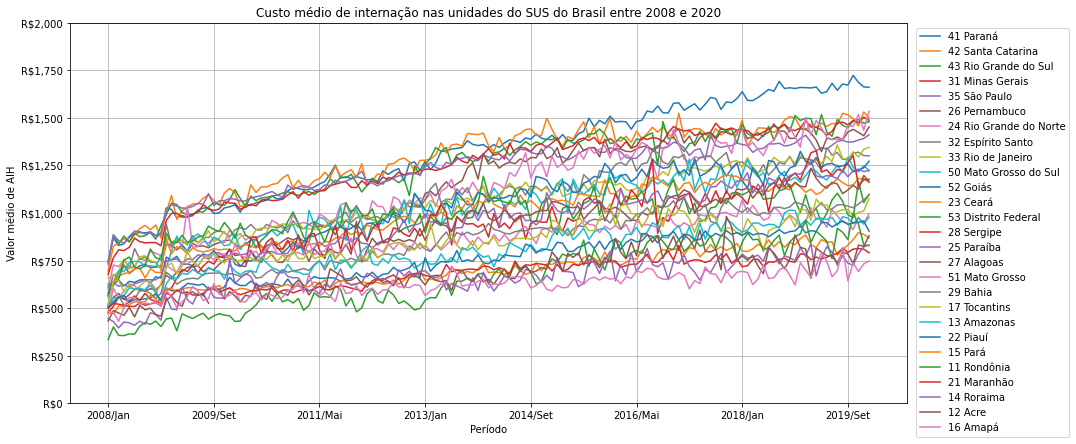

In [ ]:
ax = custos_ordenados.T.plot(figsize=(15,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
plt.xlabel('Período')
plt.ylabel('Valor médio de AIH')
plt.grid(axis='both')
plt.title('Custo médio de internação nas unidades do SUS do Brasil entre 2008 e 2020')
plt.ylim(0,2000)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### Filtro

>Filtrando o Dataframe em outros Dataframes conforme os estados escolhidos. Utilizaremos o estado do **Paraná** por ter se mostrado o mais caro dos útlimos tempos.

In [ ]:
custo_inter_pr = custo_inter.loc[['41 Paraná']]

### Tendências

>Nos gráficos a seguir podemos notar a curva de crescimento do valor médio do estado do Paraná.

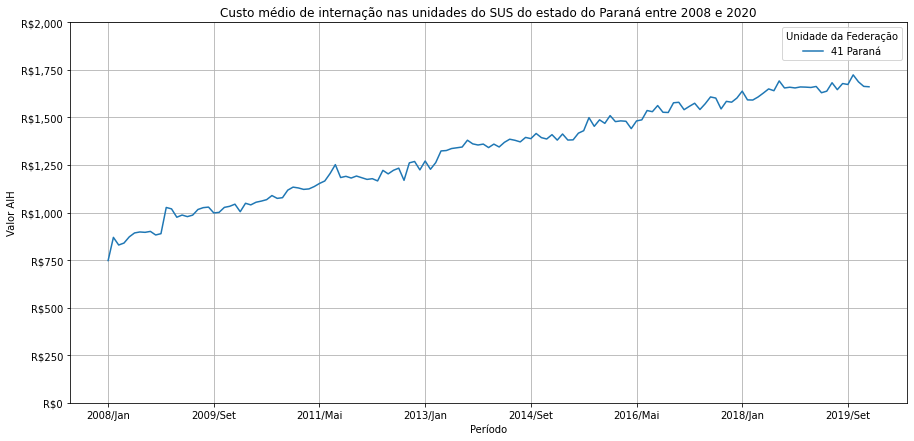

In [ ]:
ax = custo_inter_pr.T.plot(figsize=(15,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
plt.xlabel('Período')
plt.ylabel('Valor AIH')
plt.grid(axis='both')
plt.title('Custo médio de internação nas unidades do SUS do estado do Paraná entre 2008 e 2020')
plt.ylim(0,2000)
plt.show()

In [ ]:
custo_inter_pr = custo_inter_pr.rename(index={'41 Paraná':'Valor'})

In [ ]:
custo_inter_pr

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Valor,747.680,869.490,829.310,839.580,872.140,892.760,897.890,895.940,900.880,882.070,888.940,1026.660,1019.260,975.290,986.850,978.530,986.340,1016.080,1025.710,1028.580,997.880,1000.910,1027.160,1032.730,1043.940,1004.370,1048.670,1040.280,1054.250,1060.150,1067.730,1089.260,1074.440,1078.090,1117.820,1133.580,1129.260,1121.660,1124.150,1136.520,...,1527.040,1525.870,1576.880,1579.460,1540.570,1558.210,1574.490,1541.520,1571.890,1607.590,1601.610,1544.530,1584.270,1580.030,1601.910,1638.090,1592.090,1591.350,1607.370,1627.910,1649.780,1640.320,1691.840,1654.780,1658.620,1654.900,1660.100,1659.180,1657.380,1662.690,1629.760,1637.860,1682.170,1645.860,1678.010,1673.030,1723.570,1686.940,1663.060,1661.040


## IPCA acumulado

Coletando os dados de inflação acumulada dos últimos 12 meses. Os dados foram coletados através do portal [SIDRA](https://sidra.ibge.gov.br/tabela/1737), na qual é possível filtrar as informações do índice IPCA.

No Dataset baixado do site do SIDRA, estamos utilizando o filtro de **IPCA - Variação acumulada em 12 meses (% [dezembro 1980 a abril 2021]): 2 de 2 casas decimais**, do período de **janeiro 2008** a **abril 2021**.

>Importando os dados do Github

In [ ]:
url = 'https://github.com/enzoulian/bootcamp-dsa-proj-modulo1/raw/main/dados/tabela1737.csv'
dados_ipca = pd.read_csv(url, skiprows=3, skipfooter=13 ,sep=';', thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


### Tratando os dados

>Alteramos o cabeçalho do índice para que seja um nome de fácil acesso

In [ ]:
dados_ipca = dados_ipca.rename(columns={'Unnamed: 0':'Local'})

In [ ]:
ipca = dados_ipca.set_index('Local')

In [ ]:
ipca

,janeiro 2008,fevereiro 2008,março 2008,abril 2008,maio 2008,junho 2008,julho 2008,agosto 2008,setembro 2008,outubro 2008,novembro 2008,dezembro 2008,janeiro 2009,fevereiro 2009,março 2009,abril 2009,maio 2009,junho 2009,julho 2009,agosto 2009,setembro 2009,outubro 2009,novembro 2009,dezembro 2009,janeiro 2010,fevereiro 2010,março 2010,abril 2010,maio 2010,junho 2010,julho 2010,agosto 2010,setembro 2010,outubro 2010,novembro 2010,dezembro 2010,janeiro 2011,fevereiro 2011,março 2011,abril 2011,...,janeiro 2018,fevereiro 2018,março 2018,abril 2018,maio 2018,junho 2018,julho 2018,agosto 2018,setembro 2018,outubro 2018,novembro 2018,dezembro 2018,janeiro 2019,fevereiro 2019,março 2019,abril 2019,maio 2019,junho 2019,julho 2019,agosto 2019,setembro 2019,outubro 2019,novembro 2019,dezembro 2019,janeiro 2020,fevereiro 2020,março 2020,abril 2020,maio 2020,junho 2020,julho 2020,agosto 2020,setembro 2020,outubro 2020,novembro 2020,dezembro 2020,janeiro 2021,fevereiro 2021,março 2021,abril 2021
Local,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brasil,4.560,4.610,4.730,5.040,5.580,6.060,6.370,6.170,6.250,6.410,6.390,5.900,5.840,5.900,5.610,5.530,5.200,4.800,4.500,4.360,4.340,4.170,4.220,4.310,4.590,4.830,5.170,5.260,5.220,4.840,4.600,4.490,4.700,5.200,5.630,5.910,5.990,6.010,6.300,6.510,...,2.860,2.840,2.680,2.760,2.860,4.390,4.480,4.190,4.530,4.560,4.050,3.750,3.780,3.890,4.580,4.940,4.660,3.370,3.220,3.430,2.890,2.540,3.270,4.310,4.190,4.010,3.300,2.400,1.880,2.130,2.310,2.440,3.140,3.920,4.310,4.520,4.560,5.200,6.100,6.760


>Como os dados são valores percentuais, faremos a divisão dos valores por 100 para que possamos utilizar os decimais posteriormente

In [ ]:
ipca = ipca/100

In [ ]:
ipca = ipca[ipca.columns[:-15]]

>Alterando o nome do índice para IPCA

In [ ]:
ipca = ipca.rename(index={'Brasil':'IPCA'})

In [ ]:
ipca

,janeiro 2008,fevereiro 2008,março 2008,abril 2008,maio 2008,junho 2008,julho 2008,agosto 2008,setembro 2008,outubro 2008,novembro 2008,dezembro 2008,janeiro 2009,fevereiro 2009,março 2009,abril 2009,maio 2009,junho 2009,julho 2009,agosto 2009,setembro 2009,outubro 2009,novembro 2009,dezembro 2009,janeiro 2010,fevereiro 2010,março 2010,abril 2010,maio 2010,junho 2010,julho 2010,agosto 2010,setembro 2010,outubro 2010,novembro 2010,dezembro 2010,janeiro 2011,fevereiro 2011,março 2011,abril 2011,...,outubro 2016,novembro 2016,dezembro 2016,janeiro 2017,fevereiro 2017,março 2017,abril 2017,maio 2017,junho 2017,julho 2017,agosto 2017,setembro 2017,outubro 2017,novembro 2017,dezembro 2017,janeiro 2018,fevereiro 2018,março 2018,abril 2018,maio 2018,junho 2018,julho 2018,agosto 2018,setembro 2018,outubro 2018,novembro 2018,dezembro 2018,janeiro 2019,fevereiro 2019,março 2019,abril 2019,maio 2019,junho 2019,julho 2019,agosto 2019,setembro 2019,outubro 2019,novembro 2019,dezembro 2019,janeiro 2020
Local,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IPCA,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042


### Adequando colunas

>Utilizaremos os dados dos dois Dataframes, portanto, vamos adequar os nomes das colunas do Dataframe do IPCA para que fique com a mesma estrutura que o Dataframe de valor médio.

In [ ]:
ipca = pd.DataFrame(data=ipca.values, columns=custo_inter_pr.columns)

In [ ]:
ipca

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
0,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042


# Mesclando os dados

>Após importar e tratar as duas fontes de dados (valor médio e IPCA), vamos concatenar os dois Dataframes em um novo.

In [ ]:
custo_ipca = pd.concat([ipca,custo_inter_pr])

In [ ]:
custo_ipca.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
0,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042
Valor,747.680,869.490,829.310,839.580,872.140,892.760,897.890,895.940,900.880,882.070,888.940,1026.660,1019.260,975.290,986.850,978.530,986.340,1016.080,1025.710,1028.580,997.880,1000.910,1027.160,1032.730,1043.940,1004.370,1048.670,1040.280,1054.250,1060.150,1067.730,1089.260,1074.440,1078.090,1117.820,1133.580,1129.260,1121.660,1124.150,1136.520,...,1527.040,1525.870,1576.880,1579.460,1540.570,1558.210,1574.490,1541.520,1571.890,1607.590,1601.610,1544.530,1584.270,1580.030,1601.910,1638.090,1592.090,1591.350,1607.370,1627.910,1649.780,1640.320,1691.840,1654.780,1658.620,1654.900,1660.100,1659.180,1657.380,1662.690,1629.760,1637.860,1682.170,1645.860,1678.010,1673.030,1723.570,1686.940,1663.060,1661.040


## Tratamento

>Para ficar uma visualização mais agradável, renomeamos o índice referente aos dados do IPCA.

In [ ]:
custo_ipca = custo_ipca.rename(index={0:'IPCA'})

In [ ]:
custo_ipca

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
IPCA,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042
Valor,747.680,869.490,829.310,839.580,872.140,892.760,897.890,895.940,900.880,882.070,888.940,1026.660,1019.260,975.290,986.850,978.530,986.340,1016.080,1025.710,1028.580,997.880,1000.910,1027.160,1032.730,1043.940,1004.370,1048.670,1040.280,1054.250,1060.150,1067.730,1089.260,1074.440,1078.090,1117.820,1133.580,1129.260,1121.660,1124.150,1136.520,...,1527.040,1525.870,1576.880,1579.460,1540.570,1558.210,1574.490,1541.520,1571.890,1607.590,1601.610,1544.530,1584.270,1580.030,1601.910,1638.090,1592.090,1591.350,1607.370,1627.910,1649.780,1640.320,1691.840,1654.780,1658.620,1654.900,1660.100,1659.180,1657.380,1662.690,1629.760,1637.860,1682.170,1645.860,1678.010,1673.030,1723.570,1686.940,1663.060,1661.040


# Valor médio x IPCA

>Vamos inserir nesse Dataframe o custo real médio dessa AIH, aplicando o percentual da taxa IPCA no Valor médio.

In [ ]:
custo_real = custo_ipca.loc['Valor'] + custo_ipca.prod(axis=0)
custo_ipca_diff = custo_ipca.append(custo_real, ignore_index=True)

Além disso, foi inserido uma linha para mostrar a diferença em Reais (R$) entre o valor médio e o valor médio real.

In [ ]:
custo_diff = custo_ipca.prod(axis=0)
custo_ipca_diff = custo_ipca_diff.append(custo_diff, ignore_index=True)

In [ ]:
custo_ipca_diff

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
0,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042
1,747.680,869.490,829.310,839.580,872.140,892.760,897.890,895.940,900.880,882.070,888.940,1026.660,1019.260,975.290,986.850,978.530,986.340,1016.080,1025.710,1028.580,997.880,1000.910,1027.160,1032.730,1043.940,1004.370,1048.670,1040.280,1054.250,1060.150,1067.730,1089.260,1074.440,1078.090,1117.820,1133.580,1129.260,1121.660,1124.150,1136.520,...,1527.040,1525.870,1576.880,1579.460,1540.570,1558.210,1574.490,1541.520,1571.890,1607.590,1601.610,1544.530,1584.270,1580.030,1601.910,1638.090,1592.090,1591.350,1607.370,1627.910,1649.780,1640.320,1691.840,1654.780,1658.620,1654.900,1660.100,1659.180,1657.380,1662.690,1629.760,1637.860,1682.170,1645.860,1678.010,1673.030,1723.570,1686.940,1663.060,1661.040
2,781.774,909.573,868.536,881.895,920.805,946.861,955.086,951.219,957.185,938.611,945.743,1087.233,1078.785,1032.832,1042.212,1032.643,1037.630,1064.852,1071.867,1073.426,1041.188,1042.648,1070.506,1077.241,1091.857,1052.881,1102.886,1094.999,1109.282,1111.461,1116.846,1138.168,1124.939,1134.151,1180.753,1200.575,1196.903,1189.072,1194.971,1210.507,...,1647.218,1632.528,1676.066,1663.961,1613.901,1629.420,1638.729,1597.015,1619.047,1651.156,1641.010,1583.761,1627.045,1624.271,1649.166,1684.939,1637.305,1633.998,1651.733,1674.468,1722.205,1713.806,1762.728,1729.742,1734.253,1721.923,1722.354,1721.897,1721.852,1738.841,1710.270,1714.184,1738.859,1698.857,1735.566,1721.381,1767.349,1742.103,1734.738,1730.638
3,34.094,40.083,39.226,42.315,48.665,54.101,57.196,55.279,56.305,56.541,56.803,60.573,59.525,57.542,55.362,54.113,51.290,48.772,46.157,44.846,43.308,41.738,43.346,44.511,47.917,48.511,54.216,54.719,55.032,51.311,49.116,48.908,50.499,56.061,62.933,66.995,67.643,67.412,70.821,73.987,...,120.178,106.658,99.186,84.501,73.331,71.210,64.239,55.495,47.157,43.566,39.400,39.231,42.775,44.241,47.256,46.849,45.215,42.648,44.363,46.558,72.425,73.486,70.888,74.962,75.633,67.023,62.254,62.717,64.472,76.151,80.510,76.324,56.689,52.997,57.556,48.351,43.779,55.163,71.678,69.598


>Renomeando as linhas que estão com index numéricos, nesse caso, a ordem númerica dos índices não são prioridades

In [ ]:
custo_ipca_diff = custo_ipca_diff.rename(index={0:'IPCA', 1:'Valor Médio', 2:'Média Real', 3:'Diferença'})

## Resultados

### Filtrando o resultado em variáveis diferentes

> Criando variáveis únicas

In [ ]:
slc_custo = custo_ipca_diff.loc['Valor Médio']
slc_real = custo_ipca_diff.loc['Média Real']
slc_ipca = custo_ipca.loc['IPCA']
slc_ipca_vlr = custo_ipca_diff.loc['Diferença']

>Criando Dataframe do comparativo entre o Valor médio e o Valor médio real (em Reais)

In [ ]:
custo_ipca_comp = custo_ipca_diff.loc['Valor Médio':'Média Real']

In [ ]:
custo_ipca_comp

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
Valor Médio,747.680,869.490,829.310,839.580,872.140,892.760,897.890,895.940,900.880,882.070,888.940,1026.660,1019.260,975.290,986.850,978.530,986.340,1016.080,1025.710,1028.580,997.880,1000.910,1027.160,1032.730,1043.940,1004.370,1048.670,1040.280,1054.250,1060.150,1067.730,1089.260,1074.440,1078.090,1117.820,1133.580,1129.260,1121.660,1124.150,1136.520,...,1527.040,1525.870,1576.880,1579.460,1540.570,1558.210,1574.490,1541.520,1571.890,1607.590,1601.610,1544.530,1584.270,1580.030,1601.910,1638.090,1592.090,1591.350,1607.370,1627.910,1649.780,1640.320,1691.840,1654.780,1658.620,1654.900,1660.100,1659.180,1657.380,1662.690,1629.760,1637.860,1682.170,1645.860,1678.010,1673.030,1723.570,1686.940,1663.060,1661.040
Média Real,781.774,909.573,868.536,881.895,920.805,946.861,955.086,951.219,957.185,938.611,945.743,1087.233,1078.785,1032.832,1042.212,1032.643,1037.630,1064.852,1071.867,1073.426,1041.188,1042.648,1070.506,1077.241,1091.857,1052.881,1102.886,1094.999,1109.282,1111.461,1116.846,1138.168,1124.939,1134.151,1180.753,1200.575,1196.903,1189.072,1194.971,1210.507,...,1647.218,1632.528,1676.066,1663.961,1613.901,1629.420,1638.729,1597.015,1619.047,1651.156,1641.010,1583.761,1627.045,1624.271,1649.166,1684.939,1637.305,1633.998,1651.733,1674.468,1722.205,1713.806,1762.728,1729.742,1734.253,1721.923,1722.354,1721.897,1721.852,1738.841,1710.270,1714.184,1738.859,1698.857,1735.566,1721.381,1767.349,1742.103,1734.738,1730.638


> Criando Dataframe para mostrar a taxa do IPCA (percentual) e quantos reais foi equivalente à taxa IPCA (em Reais)

In [ ]:
custo_ipca_vlr = custo_ipca_diff.loc[['IPCA']]
custo_ipca_vlr = custo_ipca_vlr.append(custo_ipca_diff.loc['Diferença'])

In [ ]:
custo_ipca_vlr.loc['IPCA'] = custo_ipca_vlr.loc['IPCA'] * 100

In [ ]:
custo_ipca_vlr

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
IPCA,4.560,4.610,4.730,5.040,5.580,6.060,6.370,6.170,6.250,6.410,6.390,5.900,5.840,5.900,5.610,5.530,5.200,4.800,4.500,4.360,4.340,4.170,4.220,4.310,4.590,4.830,5.170,5.260,5.220,4.840,4.600,4.490,4.700,5.200,5.630,5.910,5.990,6.010,6.300,6.510,...,7.870,6.990,6.290,5.350,4.760,4.570,4.080,3.600,3.000,2.710,2.460,2.540,2.700,2.800,2.950,2.860,2.840,2.680,2.760,2.860,4.390,4.480,4.190,4.530,4.560,4.050,3.750,3.780,3.890,4.580,4.940,4.660,3.370,3.220,3.430,2.890,2.540,3.270,4.310,4.190
Diferença,34.094,40.083,39.226,42.315,48.665,54.101,57.196,55.279,56.305,56.541,56.803,60.573,59.525,57.542,55.362,54.113,51.290,48.772,46.157,44.846,43.308,41.738,43.346,44.511,47.917,48.511,54.216,54.719,55.032,51.311,49.116,48.908,50.499,56.061,62.933,66.995,67.643,67.412,70.821,73.987,...,120.178,106.658,99.186,84.501,73.331,71.210,64.239,55.495,47.157,43.566,39.400,39.231,42.775,44.241,47.256,46.849,45.215,42.648,44.363,46.558,72.425,73.486,70.888,74.962,75.633,67.023,62.254,62.717,64.472,76.151,80.510,76.324,56.689,52.997,57.556,48.351,43.779,55.163,71.678,69.598


## Visualização

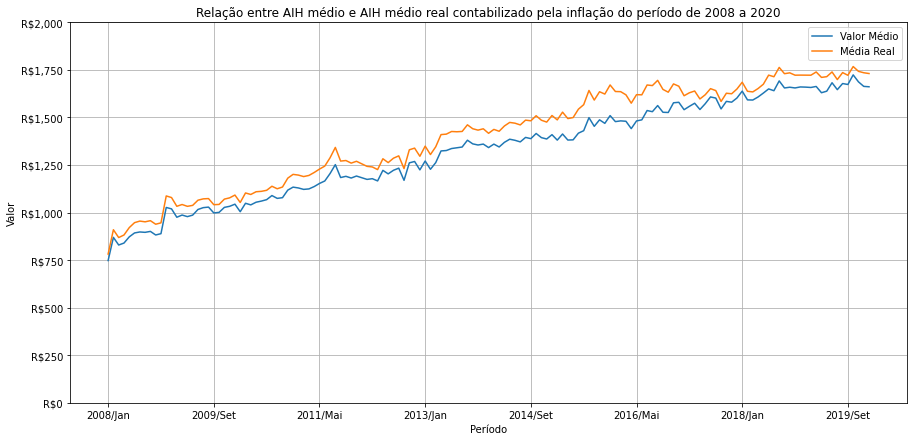

In [ ]:
ax = custo_ipca_comp.T.plot(figsize=(15,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
plt.xlabel('Período')
plt.ylabel('Valor')
plt.grid(axis='both')
plt.title('Relação entre AIH médio e AIH médio real contabilizado pela inflação do período de 2008 a 2020')
plt.ylim(0,2000)
plt.show()

>A seguir, um gráfico do **valor médio**, **valor médio real** e a taxa **IPCA** do período em escalas diferentes, porém no mesmo gráfico 

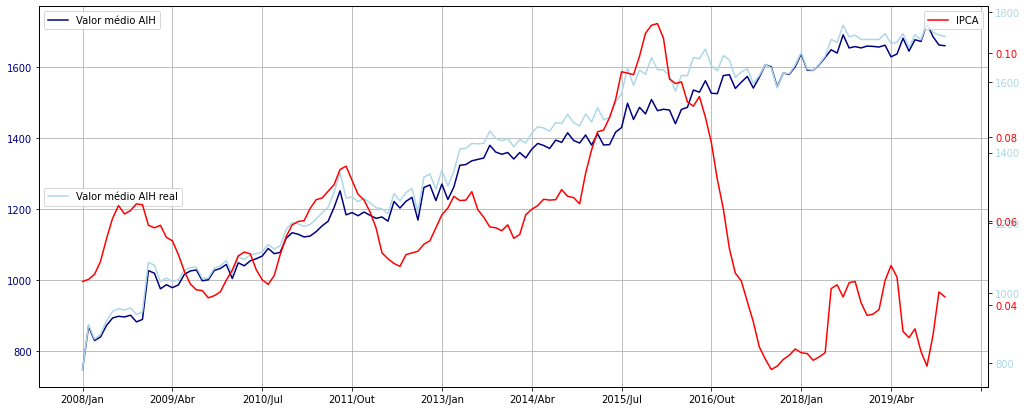

In [ ]:
fig, ax = plt.subplots(figsize=(17,7))

# Valor médio
ax.plot(slc_custo, color='navy', label='Valor médio AIH')
ax.tick_params(axis='y', labelcolor='navy')
ax.legend(loc="upper left")

ax2 = ax.twinx()

# Valor médio real
ax2.plot(slc_real, color='lightblue', label='Valor médio AIH real')
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='lightblue')
ax2.legend(loc="center left")

ax3 = ax.twinx()

# Taxa IPCA
ax3.plot(slc_ipca, color='red', label='IPCA')
ax3.tick_params(axis='y', labelcolor='red')
ax3.legend(loc="upper right")

M = 15
yticks = ticker.MaxNLocator(M)
ax.xaxis.set_major_locator(yticks)
ax.xaxis.grid('x')
ax.yaxis.grid('y')


plt.show()

> A seguir, podemos verificar os valores em Reais da diferença entre o valor médio e o valor médio real, corrigido pela inflação.

**IPCA:** Taxa IPCA (%) da data

**Diferença:** Valor médio x % IPCA do período

In [ ]:
custo_ipca_vlr

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
IPCA,4.560,4.610,4.730,5.040,5.580,6.060,6.370,6.170,6.250,6.410,6.390,5.900,5.840,5.900,5.610,5.530,5.200,4.800,4.500,4.360,4.340,4.170,4.220,4.310,4.590,4.830,5.170,5.260,5.220,4.840,4.600,4.490,4.700,5.200,5.630,5.910,5.990,6.010,6.300,6.510,...,7.870,6.990,6.290,5.350,4.760,4.570,4.080,3.600,3.000,2.710,2.460,2.540,2.700,2.800,2.950,2.860,2.840,2.680,2.760,2.860,4.390,4.480,4.190,4.530,4.560,4.050,3.750,3.780,3.890,4.580,4.940,4.660,3.370,3.220,3.430,2.890,2.540,3.270,4.310,4.190
Diferença,34.094,40.083,39.226,42.315,48.665,54.101,57.196,55.279,56.305,56.541,56.803,60.573,59.525,57.542,55.362,54.113,51.290,48.772,46.157,44.846,43.308,41.738,43.346,44.511,47.917,48.511,54.216,54.719,55.032,51.311,49.116,48.908,50.499,56.061,62.933,66.995,67.643,67.412,70.821,73.987,...,120.178,106.658,99.186,84.501,73.331,71.210,64.239,55.495,47.157,43.566,39.400,39.231,42.775,44.241,47.256,46.849,45.215,42.648,44.363,46.558,72.425,73.486,70.888,74.962,75.633,67.023,62.254,62.717,64.472,76.151,80.510,76.324,56.689,52.997,57.556,48.351,43.779,55.163,71.678,69.598


# Conclusão

>Através deste projeto foi possível visualizar:


*   Valor médio de uma internação do SUS (nível Brasil e posteriormente no local mais "caro")
*   Analisar o índice IPCA sobre o valor médio dessa internação

> O objetivo é conseguir identificar o impacto que o valor de uma internação traz ao bolso de quem está pagando essa internação. 



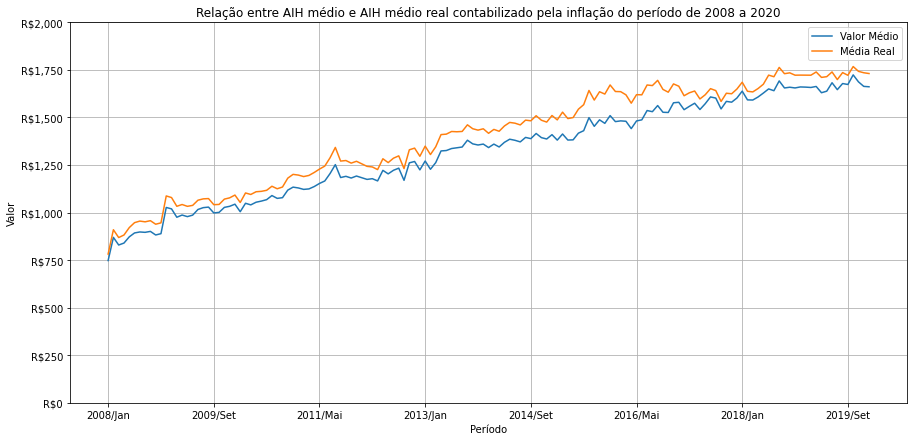

In [ ]:
ax = custo_ipca_comp.T.plot(figsize=(15,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
plt.xlabel('Período')
plt.ylabel('Valor')
plt.grid(axis='both')
plt.title('Relação entre AIH médio e AIH médio real contabilizado pela inflação do período de 2008 a 2020')
plt.ylim(0,2000)
plt.show()

>Através deste gráfico comparativo entre o **valor médio** e o **valor médio real**, é possível abstrair o real valor que foi cobrado por uma internação, e não apenas uma informação de preço. Quanto mais distante uma linha da outra, maior foi o valor cobrado.



>Esse tipo de informação passa desapercebido do usuário do dia a dia, que apenas enxerga o preço, e não o valor que saiu do seu bolso. Assim como nos investimentos, é preciso considerar a taxa IPCA para calcular o "real valor" das coisas, pois essa taxa está presente no dia a dia do brasileiro.

# Considerações Finais

>Obrigado **Alura** pelo conhecimento que está sendo compartilhado pelos professores Guilherme e Thiago, (até o momento) nos cursos e pela comunidade criada.

---

<img src='https://avatars.githubusercontent.com/u/82285207?v=4' height='200'>

[Github](https://github.com/enzoulian)

[Linkedin](linkedin.com/in/enzo-dias-ulian-5710aa139)
